In [211]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

In [130]:
def colors_from_values(values, palette_name, min_value=None, max_value=None):

    if min_value is None:
        min_value = min(values)
    if max_value is None:
        max_value = max(values)
    
    # normalize the values to range [0, 1]
    a = [value - min_value for value in values]
    b = max_value - min_value
    normalized = [value / b for value in a]
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

/Users/holylovenia/anaconda3/envs/viz/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/holylovenia/anaconda3/envs/viz/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


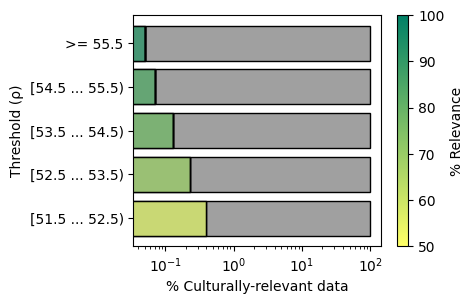

In [263]:
custom_order = {
    "[51.5 ... 52.5)": 4,
    "[52.5 ... 53.5)": 3,
    "[53.5 ... 54.5)": 2,
    "[54.5 ... 55.5)": 1,
    ">= 55.5": 0,
}
df = pd.read_csv("./data/image_filtering.csv").sort_values(
    by="threshold", key=lambda x: x.map(custom_order))

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(4, 3))

pdf = df[df["dataset"] == "CC3M"]
ax = sns.histplot(
    pdf, y='threshold', hue='type', hue_order=['others', 'culturally-relevant'],
    weights='image_proportion_percent', palette=["gray", "gray"],
    legend=False,
    multiple='stack', shrink=0.8)
ax.set_xscale("log")

pdf = df[(df["dataset"] == "CC3M") & (df["type"] == "culturally-relevant")]

ax = sns.histplot(
    pdf, y='threshold', hue="relevance_percent", hue_norm=(50, 100),
    weights='image_proportion_percent',
    palette="summer_r", legend=False,
    multiple='stack', shrink=0.8)
ax.set_xscale("log")
ax.set_xlabel("% Culturally-relevant data")
ax.set_ylabel("Threshold (ρ)")

norm = plt.Normalize(50, 100)
cbar = plt.colorbar(
    plt.cm.ScalarMappable(cmap="summer_r", norm=norm),
    ax=plt.gca(),
    label="% Relevance",
)

/Users/holylovenia/anaconda3/envs/viz/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/holylovenia/anaconda3/envs/viz/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/holylovenia/anaconda3/envs/viz/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/holylovenia/anaconda3/envs/viz/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

<Figure size 1200x400 with 0 Axes>

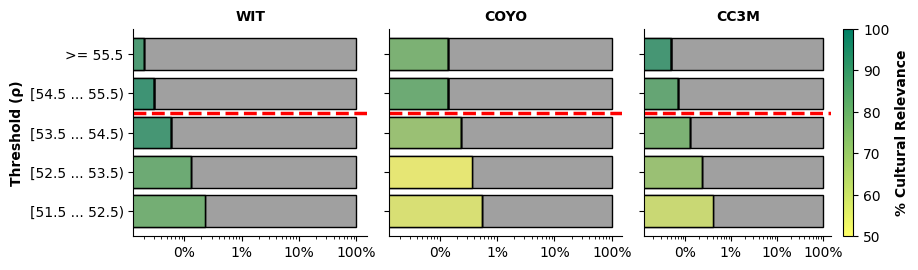

In [264]:
custom_order = {
    "[51.5 ... 52.5)": 4,
    "[52.5 ... 53.5)": 3,
    "[53.5 ... 54.5)": 2,
    "[54.5 ... 55.5)": 1,
    ">= 55.5": 0,
}
df = pd.read_csv("./data/image_filtering.csv").sort_values(
    by="threshold", key=lambda x: x.map(custom_order))

plt.figure(figsize=(12, 4))

g = sns.FacetGrid(df, col="dataset", sharex=True, sharey=True)
g.set_titles('{col_name}', fontdict={'weight': 'bold'})

# # Initialize the matplotlib figure
# f, ax = plt.subplots(figsize=(4, 3))

pdf = df

g.map_dataframe(
    sns.histplot,
    y='threshold', hue='type', hue_order=['others', 'culturally-relevant'],
    weights='image_proportion_percent', palette=["gray", "gray"],
    legend=False,
    multiple='stack', shrink=0.8
)
g.map_dataframe(
    sns.histplot,
    y='threshold', hue="relevance_percent", hue_norm=(50, 100),
    weights='image_proportion_percent',
    palette="summer_r", legend=False,
    multiple='stack', shrink=0.8,
)
g.set(
    xscale="log",
    ylabel="Threshold")
g.set_xlabels("", fontdict={'weight': 'bold'})
g.set_ylabels("Threshold (ρ)", fontdict={'weight': 'bold'})
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(ticker.PercentFormatter())

norm = plt.Normalize(50, 100)
cbar = plt.colorbar(
    plt.cm.ScalarMappable(cmap="summer_r", norm=norm),
    ax=plt.gca(),
)
cbar.set_label(label="% Cultural Relevance", weight='bold')

for ax in g.axes[0]:
    ax.axhline(1.5, ls='--', color='red', lw=2.5)

plt.savefig("./out/human_eval_image_filtering.pdf", bbox_inches='tight')